<a href="https://colab.research.google.com/github/amidrakhman/cnn-clean-and-messy-room/blob/main/CNN_Clean_vs_Messy_Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi Gambar untuk mendeteksi Ruangan Rapi (clean) atau Berantakan (messy)**

Import Tensorflow dan lihat versi tf


In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.6.0


Akses Dataset

In [4]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-10-03 08:55:28--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-10-03 08:55:28--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   164MB/s    in 0.4s    

2021-10-03 08:55:29 

Melakukan ekstrasi pada file zip dan melihat isi folder


In [5]:

import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [7]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [8]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

Augmentasi dan Pelabelan data


In [9]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Membangun Model Sequential

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**compile model** 

loss function : binary_crossentropy karena ada 2 label yaitu clean dan messy

optimizer menggunakan adam

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Melatih JST sebanyak 25 epoch

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 34s - loss: 0.7559 - accuracy: 0.5200 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 1s - loss: 0.6937 - accuracy: 0.5400 - val_loss: 0.6639 - val_accuracy: 0.5000
Epoch 3/25
25/25 - 1s - loss: 0.7000 - accuracy: 0.4700 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/25
25/25 - 1s - loss: 0.7010 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/25
25/25 - 1s - loss: 0.6933 - accuracy: 0.5400 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 6/25
25/25 - 1s - loss: 0.6931 - accuracy: 0.5200 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 7/25
25/25 - 1s - loss: 0.6751 - accuracy: 0.5800 - val_loss: 0.6390 - val_accuracy: 0.8500
Epoch 8/25
25/25 - 1s - loss: 0.7007 - accuracy: 0.5800 - val_loss: 0.6858 - val_accuracy: 0.5500
Epoch 9/25
25/25 - 1s - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 10/25
25/25 - 1s - loss: 0.6661 - accuracy: 0.5300 - val_loss: 0.6340 - val_accuracy: 0.5500
Epoch 11/25
25/25 

Uji Coba Klasifikasi


Saving WhatsApp Image 2021-10-03 at 16.19.38.jpeg to WhatsApp Image 2021-10-03 at 16.19.38.jpeg
WhatsApp Image 2021-10-03 at 16.19.38.jpeg
Ruangan ini terdeteksi Berantakan


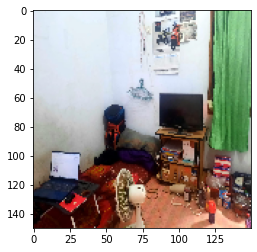

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes==0:
   print('Ruangan ini terdeteksi Berantakan')
  else:
   print('Ruangan ini terdeteksi Rapi')